In [33]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels as sm


In [4]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Actual CPI Value')
    plt.plot(predicted, color='blue',label='Predicted CPI Value')
    plt.title("Malaysia's CPI Value")
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    
def return_analysis(test,predicted):
    e=predicted-test
    mse_f = np.mean(e**2)
    mae_f = np.mean(abs(e))
    mape_f = np.mean(abs(e/predicted))*100
    rmse_f = np.sqrt(mse_f)
    r2_f = 1-(sum(e**2)/sum((predicted-np.mean(predicted))**2))
    print("The root mean squared error is {}.".format(rmse_f))
    print("The mean absolute error is {}.".format(mae_f))
    print("The mean absolute percentage error is {}.".format(mape_f), "%")   

In [12]:
# Read in the weather data csv - keep only the columns we need
df=pd.read_csv('/Users/chamyingchyi/Desktop/Academic Purpose/FYP/Dataset/Cleaned_Data.csv', encoding='utf-8')
df1=df[["Date","CPI"]]
df2=df1[0:657]
df3=df1[0:525]
print(df2)

       Date    CPI
0    Jan-68   23.4
1    Feb-68   23.3
2    Mar-68   23.3
3    Apr-68   23.2
4    May-68   23.0
..      ...    ...
652  May-22  126.6
653  Jun-22  127.4
654  Jul-22  127.9
655  Aug-22  128.2
656  Sep-22  128.3

[657 rows x 2 columns]


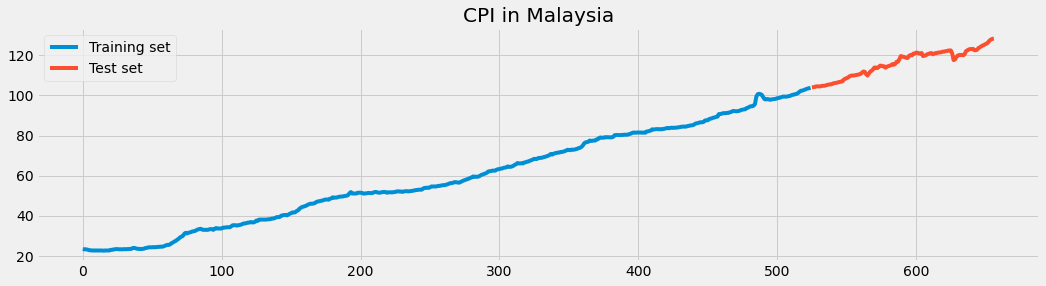

In [9]:
# Checking for missing values
training_set = df2.iloc[0:525,1:2].values
test_set =df2.iloc[525:657,1:2].values

#plot training set and test set
df2.iloc[0:525,1].plot(figsize=(16,4),legend=True)
df2.iloc[525:657,1].plot(figsize=(16,4),legend=True)
plt.legend(['Training set','Test set'])
plt.title('CPI in Malaysia')
plt.show()

p-value of training set= 0.9970928803740905
p-value of 1st order diffencing plot= 1.9112100831066858e-29
p-value of 2nd order differencing plot= 3.639417477105073e-17
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14249D-01    |proj g|=  5.95580D-03

At iterate    5    f=  1.14247D-01    |proj g|=  2.22045D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6      9      1     0     0   4.441D-08   1.142D-01
  F =  0.11424671070666789     

CONVERGENCE: REL_REDUCTION

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.


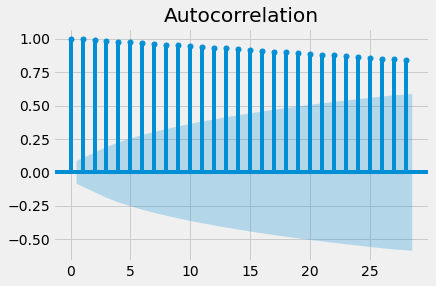

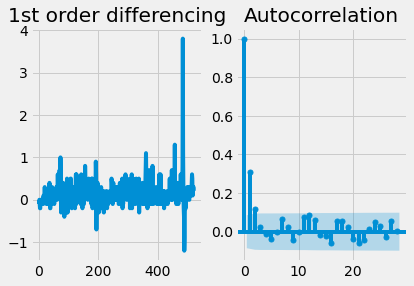

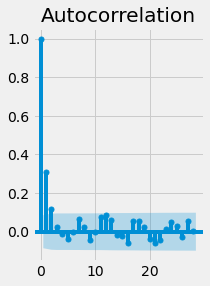

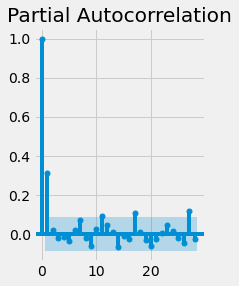

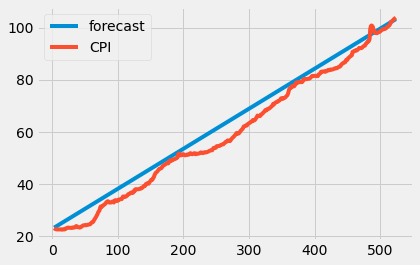

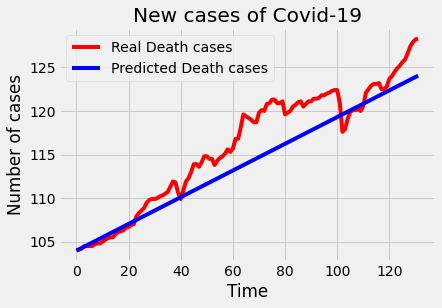

The root mean squared error is 2.766389332327826.
The mean absolute error is 2.2328888072223934.
The mean absolute percentage error is 1.9323651946158216. %


In [22]:
#ARIMA 

#determine the acf plot of data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(training_set)

#1st diff
f=plt.figure()
ax1=f.add_subplot(121)
ax1.set_title("1st order differencing")
ax1.plot(df3.CPI.diff())

ax2=f.add_subplot(122)
ax2.set_title("ACF of 1st order differencing")
plot_acf(df3.CPI.diff().dropna(),ax=ax2)

#KPSS Test
from statsmodels.tsa.stattools import adfuller
result1 = adfuller(df3.CPI.dropna())
print("p-value of training set=",result1[1])

result2 = adfuller(df3.CPI.diff().dropna())
print("p-value of 1st order diffencing plot=",result2[1])

result3 = adfuller(df3.CPI.diff().diff().dropna())
print("p-value of 2nd order differencing plot=",result3[1])

#ACF and PACF plot for 1st diff data
f=plt.figure()
ax2=f.add_subplot(122)
ax2.set_title("ACF of 1st order differencing")
plot_acf(df3.CPI.diff().dropna(),ax=ax2)

f=plt.figure()
ax3=f.add_subplot(122)
ax3.set_title("PACF of 1st order differencing")
plot_pacf(df3.CPI.diff().dropna(),ax=ax3)

#Modelling
from statsmodels.tsa.arima_model import ARIMA
arima_fit= ARIMA(df3.CPI,order=(1,1,0))
model2=arima_fit.fit()

#predict
model2.plot_predict(dynamic=True)

plt.show()

ARIMA_pre = np.array(model2.forecast(132)[0])

ARIMA_pred = np.reshape(ARIMA_pre,(132,1))
y_true = test_set


ARIMA_pred

#Test Fitness
plot_predictions(test_set,ARIMA_pred)
return_analysis(test_set,ARIMA_pred)


[0.0019267822736031104, 0.0009615384615384068, 0.0009606147934679013, 0.002879078694817631, 0.0, 0.0, 0.0, 0.0019138755980861516, 0.0009551098376312733, 0.0, 0.0019083969465649127, 0.0019047619047619319, 0.0019011406844106733, 0.0009487666034155058, 0.0, 0.00379146919431285, 0.001888574126534359, 0.0009425070688030964, 0.0009416195856873287, 0.0028222013170272546, 0.0009380863039400425, 0.0018744142455482927, 0.0009354536950420422, 0.00841121495327108, 0.00370713623725664, 0.0027700831024930488, 0.002762430939226624, 0.005509641873278184, 0.0027397260273972343, 0.0009107468123862343, 0.0, 0.0009099181073702849, 0.001818181818181844, 0.0009074410163338867, 0.0018132366273798989, 0.0018099547511312474, 0.005420054200541954, 0.005390835579514901, -0.0008936550491511039, -0.010733452593917735, -0.0063291139240505305, 0.009099181073703366, 0.009017132551848512, 0.0035746201966040344, 0.006233303650935021, 0.007964601769911555, 0.0, -0.0026338893766462805, 0.0044014084507042256, 0.0061349693

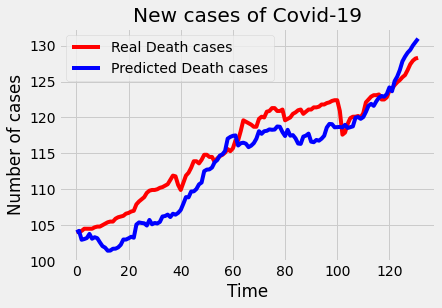

The root mean squared error is 2.901326131530699.
The mean absolute error is 2.5131224116014645.
The mean absolute percentage error is 2.2504236140416047. %


In [28]:
#GBM Modelling

returns = (df2.loc[525:, 'CPI'] - \
           df2.shift(1).loc[525:, 'CPI']) / \
           df2.shift(1).loc[525:, 'CPI']
print(returns.tolist())

# Parameter Assignments
So = df2.loc[525,"CPI"]
dt = 1 # day   # User input

T = len(test_set) # days  # User input -> follows from pred_end_date
N = T / dt
t = np.arange(1, int(N)+1)
mu = np.mean(returns)
sigma = np.std(returns)

scen_size = 1
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}

print("mean =",mu)
print("standard deviation =",sigma)

# Calculating drift and diffusion components
drift = (mu - 0.5 * sigma**2) * t
print(drift)
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}
print(diffusion)

# add So to the beginning series
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)])  
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S))
GBM_predict = pd.DataFrame()
A=S.T
GBM_pred=A[0:132]
print(GBM_pred)

#Test Fitness
plot_predictions(test_set,GBM_pred)
return_analysis(test_set,GBM_pred)



[[ 20  20]
 [ 20  24]
 [ 20  28]
 ...
 [108 100]
 [108 104]
 [108 108]]
number of elements: 529
[ 23.4  23.3  23.3  23.2  23.   22.8  22.8  22.7  22.7  22.7  22.7  22.7
  22.7  22.7  22.7  22.6  22.7  22.7  22.7  22.7  23.   23.   23.2  23.3
  23.4  23.4  23.3  23.3  23.3  23.3  23.4  23.3  23.4  23.4  23.5  23.5
  23.9  24.   23.8  23.6  23.5  23.5  23.4  23.5  23.6  23.9  24.   24.2
  24.3  24.3  24.3  24.4  24.3  24.4  24.5  24.5  24.6  24.6  24.7  25.
  25.3  25.5  25.5  25.8  26.4  26.7  27.2  27.5  28.1  28.5  29.2  29.6
  29.9  30.9  31.5  31.2  31.5  31.7  31.9  32.2  32.3  32.5  32.9  33.2
  33.4  33.5  33.1  33.   33.   33.   33.   33.2  33.4  33.3  33.   33.5
  33.9  33.6  33.7  33.6  33.7  34.1  34.1  34.2  34.3  34.3  34.3  34.8
  35.3  35.3  35.3  35.1  35.3  35.4  35.6  35.9  36.2  36.2  36.4  36.6
  36.6  36.9  36.7  36.7  37.   37.6  37.5  38.1  38.1  38.1  38.1  38.1
  38.1  38.2  38.3  38.3  38.6  38.6  38.8  39.1  39.4  39.3  39.5  40.1
  40.2  40.4  40.4  40.2  40.

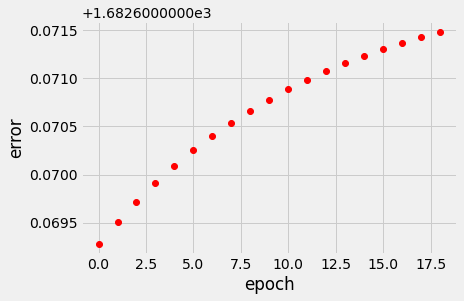

Plotting results


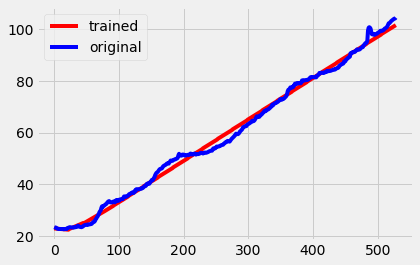

22.722412926515826 6


In [38]:
#ANFIS Model
import anfis
from anfis import mfDerivs
from anfis import membershipfunction
from anfis import anfis2

ts = np.loadtxt("/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/anfis/trainingSet.txt", usecols=[1,2,3])
test_set =df.iloc[529:657,1:2].values
train_set=df.iloc[0:529,1:2].values
dfx=pd.read_csv("/Users/chamyingchyi/Desktop/Academic Purpose/FYP/Dataset/ANFISX.csv")
X = ts[:,0:2]
Y = ts[:,2]
R = dfx.iloc[0:529,0:2].values
R1 = train_set.flatten()

print(R)
print("number of elements:",len(train_set))

print(R1)
print("number of elements:",len(R1))

mf = [[['gaussmf',{'mean':0.,'sigma':1.}],['gaussmf',{'mean':-1.,'sigma':2.}],['gaussmf',{'mean':-4.,'sigma':10.}],['gaussmf',{'mean':-7.,'sigma':7.}]],
            [['gaussmf',{'mean':1.,'sigma':2.}],['gaussmf',{'mean':2.,'sigma':3.}],['gaussmf',{'mean':-2.,'sigma':10.}],['gaussmf',{'mean':-10.5,'sigma':5.}]]]


mfc = anfis.membershipfunction.MemFuncs(mf)
anf = anfis2.ANFIS(R, R1, mfc)
anf.trainHybridJangOffLine(epochs=20)
print(round(anf.consequents[-1][0],6))
print(round(anf.consequents[-2][0],6))
print(round(anf.fittedValues[9][0],6))
if round(anf.consequents[-1][0],6) == -5.275538 and round(anf.consequents[-2][0],6) == -1.990703 and round(anf.fittedValues[9][0],6) == 0.002249:
	print('test is good')

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()

print(anf.fittedValues[9][0],6)

In [87]:
# Checking for missing values
training_set = df2.iloc[0:525,1:2].values
test_set =df2.iloc[525:657,1:2].values

print(training_set,test_set)

sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

# Since GRU store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,525):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))



[[ 23.4]
 [ 23.3]
 [ 23.3]
 [ 23.2]
 [ 23. ]
 [ 22.8]
 [ 22.8]
 [ 22.7]
 [ 22.7]
 [ 22.7]
 [ 22.7]
 [ 22.7]
 [ 22.7]
 [ 22.7]
 [ 22.7]
 [ 22.6]
 [ 22.7]
 [ 22.7]
 [ 22.7]
 [ 22.7]
 [ 23. ]
 [ 23. ]
 [ 23.2]
 [ 23.3]
 [ 23.4]
 [ 23.4]
 [ 23.3]
 [ 23.3]
 [ 23.3]
 [ 23.3]
 [ 23.4]
 [ 23.3]
 [ 23.4]
 [ 23.4]
 [ 23.5]
 [ 23.5]
 [ 23.9]
 [ 24. ]
 [ 23.8]
 [ 23.6]
 [ 23.5]
 [ 23.5]
 [ 23.4]
 [ 23.5]
 [ 23.6]
 [ 23.9]
 [ 24. ]
 [ 24.2]
 [ 24.3]
 [ 24.3]
 [ 24.3]
 [ 24.4]
 [ 24.3]
 [ 24.4]
 [ 24.5]
 [ 24.5]
 [ 24.6]
 [ 24.6]
 [ 24.7]
 [ 25. ]
 [ 25.3]
 [ 25.5]
 [ 25.5]
 [ 25.8]
 [ 26.4]
 [ 26.7]
 [ 27.2]
 [ 27.5]
 [ 28.1]
 [ 28.5]
 [ 29.2]
 [ 29.6]
 [ 29.9]
 [ 30.9]
 [ 31.5]
 [ 31.2]
 [ 31.5]
 [ 31.7]
 [ 31.9]
 [ 32.2]
 [ 32.3]
 [ 32.5]
 [ 32.9]
 [ 33.2]
 [ 33.4]
 [ 33.5]
 [ 33.1]
 [ 33. ]
 [ 33. ]
 [ 33. ]
 [ 33. ]
 [ 33.2]
 [ 33.4]
 [ 33.3]
 [ 33. ]
 [ 33.5]
 [ 33.9]
 [ 33.6]
 [ 33.7]
 [ 33.6]
 [ 33.7]
 [ 34.1]
 [ 34.1]
 [ 34.2]
 [ 34.3]
 [ 34.3]
 [ 34.3]
 [ 34.8]
 [ 35.3]
 [ 35.3]
 [ 35.3]
 

In [84]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=100,batch_size=64)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


8/8 [==============================] - 12s 191ms/step - loss: 0.1606
Epoch 2/100
8/8 [==============================] - 1s 151ms/step - loss: 0.0767
Epoch 3/100
8/8 [==============================] - 1s 150ms/step - loss: 0.0518
Epoch 4/100
8/8 [==============================] - 1s 156ms/step - loss: 0.0367
Epoch 5/100
8/8 [==============================] - 1s 160ms/step - loss: 0.0231
Epoch 6/100
8/8 [==============================] - 1s 170ms/step - loss: 0.0132
Epoch 7/100
8/8 [==============================] - 2s 199ms/step - loss: 0.0068
Epoch 8/100
8/8 [==============================] - 1s 147ms/step - loss: 0.0053
Epoch 9/100
8/8 [==============================] - 1s 150ms/step - loss: 0.0044
Epoch 10/100
8/8 [==============================] - 1s 150ms/step - loss: 0.0040
Epoch 11/100
8/8 [==============================] - 1s 179ms/step - loss: 0.0036
Epoch 12/100
8/8 [==============================] - 1s 140ms/step - loss: 0.0039
Epoch 13/100
8/8 [==============================

In [45]:
# The LSTM architecture
regressorLSTM = Sequential()
# First LSTM layer with Dropout regularisation
regressorLSTM.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressorLSTM.add(Dropout(0.2))
# Second LSTM layer
regressorLSTM.add(LSTM(units=50, return_sequences=True))
regressorLSTM.add(Dropout(0.2))
# Third LSTM layer
regressorLSTM.add(LSTM(units=50, return_sequences=True))
regressorLSTM.add(Dropout(0.2))
# Fourth LSTM layer
regressorLSTM.add(LSTM(units=50))
regressorLSTM.add(Dropout(0.2))
# The output layer
regressorLSTM.add(Dense(units=1))
# Compiling the RNN
regressorLSTM.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorLSTM.fit(X_train,y_train,epochs=100,batch_size=64)

Epoch 1/100
8/8 [==============================] - 10s 171ms/step - loss: 0.1535
Epoch 2/100
8/8 [==============================] - 1s 166ms/step - loss: 0.1030
Epoch 3/100
8/8 [==============================] - 1s 171ms/step - loss: 0.0780
Epoch 4/100
8/8 [==============================] - 1s 169ms/step - loss: 0.0567
Epoch 5/100
8/8 [==============================] - 1s 157ms/step - loss: 0.0432
Epoch 6/100
8/8 [==============================] - 1s 160ms/step - loss: 0.0345
Epoch 7/100
8/8 [==============================] - 1s 162ms/step - loss: 0.0177
Epoch 8/100
8/8 [==============================] - 1s 162ms/step - loss: 0.0059
Epoch 9/100
8/8 [==============================] - 1s 157ms/step - loss: 0.0043
Epoch 10/100
8/8 [==============================] - 1s 172ms/step - loss: 0.0042
Epoch 11/100
8/8 [==============================] - 2s 194ms/step - loss: 0.0039
Epoch 12/100
8/8 [==============================] - 1s 161ms/step - loss: 0.0042
Epoch 13/100
8/8 [==================

In [88]:
dataset_total = pd.concat((df2.iloc[0:525,1:2],df2.iloc[525:657,1:2]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)



In [92]:
X_test = []
for i in range(60,192):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_pred = regressorGRU.predict(X_test)
GRU_pred = sc.inverse_transform(GRU_pred)

In [93]:
X_test = []
for i in range(60,192):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
LSTM_pred = regressorLSTM.predict(X_test)
LSTM_pred = sc.inverse_transform(LSTM_pred)


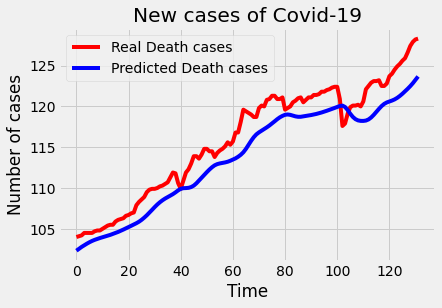

The root mean squared error is 2.598869456521924.
The mean absolute error is 2.3707544500177553.
The mean absolute percentage error is 2.0646285601833525. %


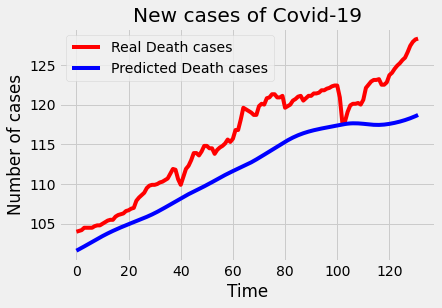

The root mean squared error is 4.705036290677448.
The mean absolute error is 4.2724226518110795.
The mean absolute percentage error is 3.777778926293872. %


In [94]:
#Test Fitness
plot_predictions(test_set,GRU_pred)
return_analysis(test_set,GRU_pred)
#Test Fitness
plot_predictions(test_set,LSTM_pred)
return_analysis(test_set,LSTM_pred)

In [95]:
# The GRU architecture
regressor = Sequential()
# First GRU layer with Dropout regularisation
regressor.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressor.add(Dropout(0.2))
# Fourth GRU layer
regressor.add(GRU(units=50, activation='tanh'))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))
# Compiling the RNN
regressor.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=100,batch_size=64)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


8/8 [==============================] - 5s 79ms/step - loss: 0.1394
Epoch 2/100
8/8 [==============================] - 1s 73ms/step - loss: 0.0823
Epoch 3/100
8/8 [==============================] - 1s 70ms/step - loss: 0.0498
Epoch 4/100
8/8 [==============================] - 1s 73ms/step - loss: 0.0250
Epoch 5/100
8/8 [==============================] - 1s 79ms/step - loss: 0.0156
Epoch 6/100
8/8 [==============================] - 1s 72ms/step - loss: 0.0077
Epoch 7/100
8/8 [==============================] - 1s 74ms/step - loss: 0.0050
Epoch 8/100
8/8 [==============================] - 1s 74ms/step - loss: 0.0039
Epoch 9/100
8/8 [==============================] - 1s 72ms/step - loss: 0.0040
Epoch 10/100
8/8 [==============================] - 1s 84ms/step - loss: 0.0038
Epoch 11/100
8/8 [==============================] - 1s 75ms/step - loss: 0.0038
Epoch 12/100
8/8 [==============================] - 1s 81ms/step - loss: 0.0035
Epoch 13/100
8/8 [==============================] - 1s 71ms/s

In [96]:
X_test = []
for i in range(60,192):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
ANFIS_pred = regressor.predict(X_test)
ANFIS_pred = sc.inverse_transform(ANFIS_pred)



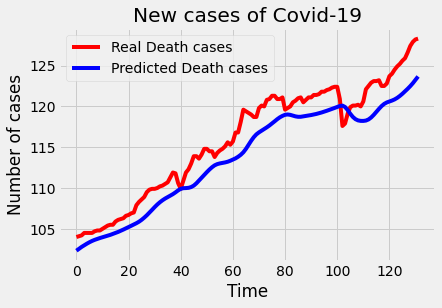

The root mean squared error is 2.598869456521924.
The mean absolute error is 2.3707544500177553.
The mean absolute percentage error is 2.0646285601833525. %


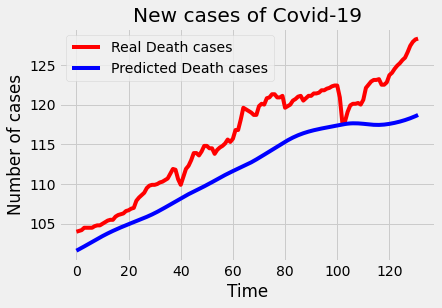

The root mean squared error is 4.705036290677448.
The mean absolute error is 4.2724226518110795.
The mean absolute percentage error is 3.777778926293872. %


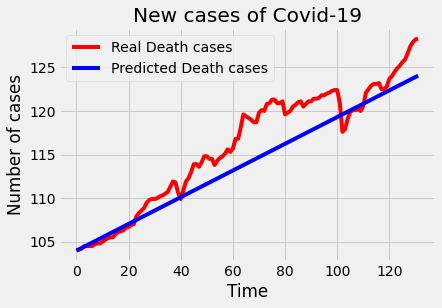

The root mean squared error is 2.766389332327826.
The mean absolute error is 2.2328888072223934.
The mean absolute percentage error is 1.9323651946158216. %


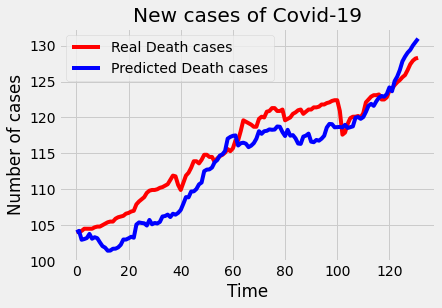

The root mean squared error is 2.901326131530699.
The mean absolute error is 2.5131224116014645.
The mean absolute percentage error is 2.2504236140416047. %


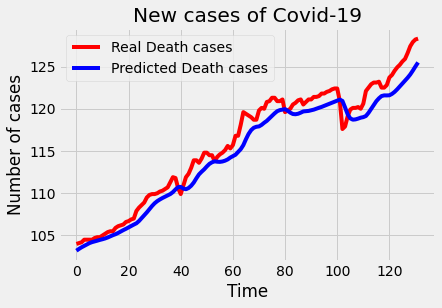

The root mean squared error is 1.6581065185070611.
The mean absolute error is 1.4440321604410804.
The mean absolute percentage error is 1.2413341845952897. %


In [133]:
#Test Fitness
plot_predictions(test_set,GRU_pred)
return_analysis(test_set,GRU_pred)

plot_predictions(test_set,LSTM_pred)
return_analysis(test_set,LSTM_pred)

plot_predictions(test_set,ARIMA_pred)
return_analysis(test_set,ARIMA_pred)

plot_predictions(test_set,GBM_pred)
return_analysis(test_set,GBM_pred)

plot_predictions(test_set,ANFIS_pred)
return_analysis(test_set,ANFIS_pred)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'Q-Q Plot for ANFIS')

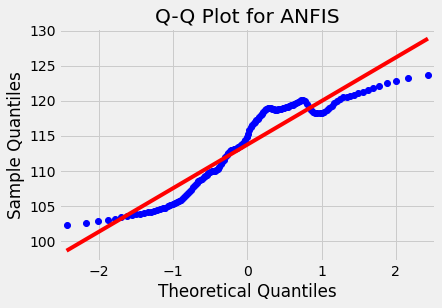

In [202]:
import statsmodels.api as sm

sm.qqplot(GRU_pred,line="s")
plt.title("Q-Q Plot for ANFIS")



[-3.72933463e-01 -2.29122000e-01 -1.14659824e-01 -2.47413386e-01
 -4.10136203e-02  1.35284137e-01  2.69865163e-01  1.48590317e-01
  1.43752215e-01  2.52232999e-01  1.26886788e-01  1.78724953e-02
 -6.50327640e-02 -1.45375632e-02  1.45255503e-01 -1.55835917e-01
 -1.96878783e-01 -1.05118989e-01 -1.97959194e-02 -1.67859455e-01
 -7.91191500e-02 -1.05508911e-01 -2.11512750e-02 -8.13636614e-01
 -9.30348925e-01 -8.66195678e-01 -7.85594123e-01 -1.03557270e+00
 -9.20451112e-01 -5.93034314e-01 -2.15550569e-01 -3.26315138e-02
 -2.08218640e-02  7.43853183e-02  3.76810411e-02 -6.26342894e-04
 -4.62077229e-01 -8.38880055e-01 -3.64633459e-01  1.24817636e+00
  2.02451348e+00  7.18941519e-01 -4.47724843e-01 -7.09581863e-01
 -1.14971740e+00 -1.67480435e+00 -1.09408876e+00 -2.40439538e-01
 -4.14359989e-01 -8.35622351e-01 -4.41861341e-01  2.31120064e-01
  4.48860718e-01  1.33118134e+00  7.39181457e-01  3.96543784e-01
  2.36238051e-01  2.53111703e-02 -3.42539629e-01  2.34011298e-01
 -9.40591823e-03 -9.88727

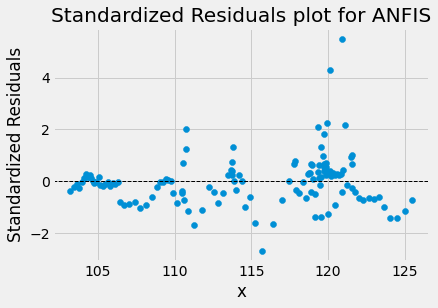

In [200]:


k= ANFIS_pred

#define response variable
y = k

#define explanatory variable
x = test_set

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit() 

#create instance of influence
influence = model.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal

#display standardized residuals
print(standardized_residuals)

import matplotlib.pyplot as plt

plt.scatter(k, standardized_residuals)
plt.xlabel('x')
plt.ylabel('Standardized Residuals')
plt.title("Standardized Residuals plot for ANFIS")
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

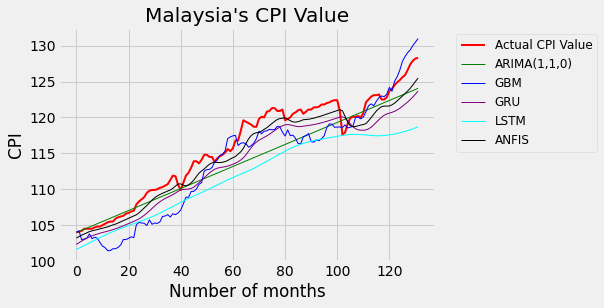

In [132]:
plt.plot(test_set, color='red',linewidth=2,label='Actual CPI Value')
plt.plot(ARIMA_pred, color='green',linewidth=1,label='ARIMA(1,1,0)')
plt.plot(GBM_pred, color='blue',linewidth=1,label='GBM')
plt.plot(GRU_pred, color='purple',linewidth=1,label='GRU')
plt.plot(LSTM_pred, color='cyan',linewidth=1,label='LSTM')
plt.plot(ANFIS_pred, color='black',linewidth=1,label='ANFIS')
plt.title("Malaysia's CPI Value")
plt.xlabel('Number of months')
plt.ylabel('CPI')
plt.legend(loc=2, prop={'size': 12},bbox_to_anchor=(1.04,1))
plt.show()

In [118]:
#plot training set and test set
GRU_pred.plot(figsize=(16,4),legend=True)
df2.iloc[525:657,1].plot(figsize=(16,4),legend=True)
plt.legend(['Training set','Test set'])
plt.title('CPI in Malaysia')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'